In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


api = wandb.Api()

In [2]:
def plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list):
    curriculum_ids = [i for i, name in enumerate(name_list) if name.startswith("curriculum")]
    suponly_ids = [i for i, name in enumerate(name_list) if name.startswith("suponly")]

    curriculum_supervision_ratios = [config_list[i]['datamodule']['dataset_parameters']['supervision_ratio'][0] for i in curriculum_ids]
    suponly_supervision_ratios = [config_list[i]['datamodule']['dataset_parameters']['supervision_ratio'][0] for i in suponly_ids]

    curriculum_z_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/Z'] for i in curriculum_ids]
    curriculum_z_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/Z'] for i in curriculum_ids]
    curriculum_z_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/Z'] for i in curriculum_ids]
    curriculum_z_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/Z'] for i in curriculum_ids]

    curriculum_x_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/X'] for i in curriculum_ids]
    curriculum_x_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/X'] for i in curriculum_ids]
    curriculum_x_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/X'] for i in curriculum_ids]
    curriculum_x_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/X'] for i in curriculum_ids]

    suponly_z_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/Z'] for i in suponly_ids]
    suponly_z_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/Z'] for i in suponly_ids]
    suponly_z_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/Z'] for i in suponly_ids]
    suponly_z_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/Z'] for i in suponly_ids]

    suponly_x_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/X'] for i in suponly_ids]
    suponly_x_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/X'] for i in suponly_ids]
    suponly_x_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/X'] for i in suponly_ids]
    suponly_x_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/X'] for i in suponly_ids]       

    # plotting the X and Z test accuracies, with error bars, 2*2 subplots with shaded error bars
    # sharing the x and y axes, and a legend, logarithmic x axis
    fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
    fig.suptitle('Test Accuracy vs Supervision Ratio')
    clrs = sns.color_palette("husl", 5)
    with sns.axes_style("darkgrid"):
        axs[0, 0].set_title('Z Sentence Accuracy')
        axs[0, 0].set_xlabel('Supervision Ratio')
        axs[0, 0].set_ylabel('Accuracy')
        axs[0, 0].set_xscale('log')
        axs[0, 0].plot(curriculum_supervision_ratios, curriculum_z_sentence_test_acc_means, label='curriculum', color=clrs[0])
        axs[0, 0].plot(suponly_supervision_ratios, suponly_z_sentence_test_acc_means, label='suponly', color=clrs[1])
        axs[0,0].fill_between(curriculum_supervision_ratios, np.array(curriculum_z_sentence_test_acc_means) - np.array(curriculum_z_sentence_test_acc_stds), np.array(curriculum_z_sentence_test_acc_means) + np.array(curriculum_z_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[0,0].fill_between(suponly_supervision_ratios, np.array(suponly_z_sentence_test_acc_means) - np.array(suponly_z_sentence_test_acc_stds), np.array(suponly_z_sentence_test_acc_means) + np.array(suponly_z_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[0, 0].legend()

        axs[0, 1].set_title('Z Word Accuracy')
        axs[0, 1].set_xlabel('Supervision Ratio')
        axs[0, 1].set_ylabel('Accuracy')
        axs[0, 1].set_xscale('log')
        axs[0, 1].plot(curriculum_supervision_ratios, curriculum_z_word_test_acc_means, label='curriculum', color=clrs[0])
        axs[0, 1].plot(suponly_supervision_ratios, suponly_z_word_test_acc_means, label='suponly', color=clrs[1])
        axs[0,1].fill_between(curriculum_supervision_ratios, np.array(curriculum_z_word_test_acc_means) - np.array(curriculum_z_word_test_acc_stds), np.array(curriculum_z_word_test_acc_means) + np.array(curriculum_z_word_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[0,1].fill_between(suponly_supervision_ratios, np.array(suponly_z_word_test_acc_means) - np.array(suponly_z_word_test_acc_stds), np.array(suponly_z_word_test_acc_means) + np.array(suponly_z_word_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[0, 1].legend()

        axs[1, 0].set_title('X Sentence Accuracy')
        axs[1, 0].set_xlabel('Supervision Ratio')
        axs[1, 0].set_ylabel('Accuracy')
        axs[1, 0].set_xscale('log')
        axs[1, 0].plot(curriculum_supervision_ratios, curriculum_x_sentence_test_acc_means, label='curriculum', color=clrs[0])
        axs[1, 0].plot(suponly_supervision_ratios, suponly_x_sentence_test_acc_means, label='suponly', color=clrs[1])
        axs[1,0].fill_between(curriculum_supervision_ratios, np.array(curriculum_x_sentence_test_acc_means) - np.array(curriculum_x_sentence_test_acc_stds), np.array(curriculum_x_sentence_test_acc_means) + np.array(curriculum_x_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[1,0].fill_between(suponly_supervision_ratios, np.array(suponly_x_sentence_test_acc_means) - np.array(suponly_x_sentence_test_acc_stds), np.array(suponly_x_sentence_test_acc_means) + np.array(suponly_x_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[1, 0].legend()

        axs[1, 1].set_title('X Word Accuracy')
        axs[1, 1].set_xlabel('Supervision Ratio')
        axs[1, 1].set_ylabel('Accuracy')
        axs[1, 1].set_xscale('log')
        axs[1, 1].plot(curriculum_supervision_ratios, curriculum_x_word_test_acc_means, label='curriculum', color=clrs[0])
        axs[1, 1].plot(suponly_supervision_ratios, suponly_x_word_test_acc_means, label='suponly', color=clrs[1])
        axs[1,1].fill_between(curriculum_supervision_ratios, np.array(curriculum_x_word_test_acc_means) - np.array(curriculum_x_word_test_acc_stds), np.array(curriculum_x_word_test_acc_means) + np.array(curriculum_x_word_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[1,1].fill_between(suponly_supervision_ratios, np.array(suponly_x_word_test_acc_means) - np.array(suponly_x_word_test_acc_stds), np.array(suponly_x_word_test_acc_means) + np.array(suponly_x_word_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[1, 1].legend()

    plt.show()


    # plotting only 1 sentence accuracy, z as solid line, x as dashed line, same error shading
    fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharex=True, sharey=True)
    fig.suptitle('Test Accuracy vs Supervision Ratio')
    clrs = sns.color_palette("husl", 5)

    axs.set_title('Sentence Accuracy')
    axs.set_xlabel('Supervision Ratio')
    axs.set_ylabel('Accuracy')
    axs.set_xscale('log')
    
    axs.plot(curriculum_supervision_ratios, curriculum_z_sentence_test_acc_means, label='curriculum Z', color=clrs[0])
    axs.plot(suponly_supervision_ratios, suponly_z_sentence_test_acc_means, label='suponly Z', color=clrs[1])
    # axs.plot(curriculum_supervision_ratios, curriculum_x_sentence_test_acc_means, label='curriculum X', color=clrs[2], linestyle='--')
    # axs.plot(suponly_supervision_ratios, suponly_x_sentence_test_acc_means, label='suponly X', color=clrs[3], linestyle='--')
    axs.fill_between(curriculum_supervision_ratios, np.array(curriculum_z_sentence_test_acc_means) - np.array(curriculum_z_sentence_test_acc_stds), np.array(curriculum_z_sentence_test_acc_means) + np.array(curriculum_z_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
    axs.fill_between(suponly_supervision_ratios, np.array(suponly_z_sentence_test_acc_means) - np.array(suponly_z_sentence_test_acc_stds), np.array(suponly_z_sentence_test_acc_means) + np.array(suponly_z_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
    # axs.fill_between(curriculum_supervision_ratios, np.array(curriculum_x_sentence_test_acc_means) - np.array(curriculum_x_sentence_test_acc_stds), np.array(curriculum_x_sentence_test_acc_means) + np.array(curriculum_x_sentence_test_acc_stds), alpha=0.2, color=clrs[2])
    # axs.fill_between(suponly_supervision_ratios, np.array(suponly_x_sentence_test_acc_means) - np.array(suponly_x_sentence_test_acc_stds), np.array(suponly_x_sentence_test_acc_means) + np.array(suponly_x_sentence_test_acc_stds), alpha=0.2, color=clrs[3])
    
    # Set grid lines at the data points
    axs.set_axisbelow(True)
    axs.grid(color='gray', linestyle='dashed')

    # Set custom tick locations for x and y axes
    axs.set_xticks(curriculum_supervision_ratios)
    axs.set_xticklabels([str(val) for val in axs.get_xticks()])


    axs.legend()

    plt.show()
    

In [3]:
entity, project = "sigmae", "test_pcfg_set_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

# plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [ ]:
entity, project = "mh-amani1998", "sfst_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [38]:
# datasets_names = ["SCAN", "SFST", "PCFG", "COGS", "CFQ"]
datasets_names = ["SCAN", "PCFG", "COGS", "CFQ"]
etas = dict.fromkeys(datasets_names)
etas["SCAN"] = [0.04, 0.08, 0.16, 0.32]
etas["SFST"] = [0.04, 0.08, 0.16, 0.32]
etas["PCFG"] = [0.04, 0.08, 0.16, 0.32]
etas["COGS"] = [0.02, 0.04, 0.08, 0.16]
etas["CFQ"] = [0.01, 0.02, 0.04, 0.08]

methods = ["curriculum", "suponly", "mixed", "reverse_curriculum", "unsup"]
discretizers = ["softmax", "gumbel", "vqvae"]

z_acc_autoreg_hidden_layer = {}.fromkeys(datasets_names)
z_acc_autoreg_sentence_hidden_layer = {}.fromkeys(datasets_names)
z_acc_autoreg = {}.fromkeys(datasets_names)
z_acc_autoreg_sentence = {}.fromkeys(datasets_names)
x_acc_teacherforced = {}.fromkeys(datasets_names)
metrics = [z_acc_autoreg_hidden_layer, z_acc_autoreg_sentence_hidden_layer, z_acc_autoreg, z_acc_autoreg_sentence, x_acc_teacherforced]

for metric in metrics:
    for dataset in datasets_names:
        metric[dataset] = {}.fromkeys(methods)
        for method in methods:
            metric[dataset][method] = {}.fromkeys(discretizers)
            for disc in discretizers:
                metric[dataset][method][disc] = [[], []] #  list of lists, first list is mean, second list is std




### SFST metrics

In [ ]:
# ------------------- SFST ------------------- #
# sfst, suponly, softmax
dataset, method, disc, metric = "SFST", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# sfst, suponly, gumbel
dataset, method, disc, metric = "SFST", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# sfst, suponly, vqvae
dataset, method, disc, metric = "SFST", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, curriculum, softmax
dataset, method, disc, metric = "SFST", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# sfst, curriculum, gumbel
dataset, method, disc, metric = "SFST", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# sfst, curriculum, vqvae
dataset, method, disc, metric = "SFST", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, mixed, softmax
dataset, method, disc, metric = "SFST", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, mixed, gumbel
dataset, method, disc, metric = "SFST", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, mixed, vqvae
dataset, method, disc, metric = "SFST", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, reverse_curriculum, softmax
dataset, method, disc, metric = "SFST", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, reverse_curriculum, gumbel
dataset, method, disc, metric = "SFST", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# sfst, reverse_curriculum, vqvae
dataset, method, disc, metric = "SFST", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# sfst, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "SFST", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# sfst, reverse_curriculum, gumbel
dataset, method, disc, metric = "SFST", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# sfst, reverse_curriculum, vqvae
dataset, method, disc, metric = "SFST", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


### SCAN metrics

In [39]:
# ------------------- SCAN ------------------- #
# scan, suponly, softmax
dataset, method, disc, metric = "SCAN", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.78396, 0.92117, 0.98305, 0.99775, 1.0]
metric[dataset][method][disc][1] = [0.00336, 0.00255, 0.00077, 0.00027, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.17989, 0.52403, 0.86865, 0.97073, 1.0]
metric[dataset][method][disc][1] = [0.00764, 0.00724, 0.00332, 0.00339, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.74104, 0.80512, 0.88611, 0.91767, 0.96425]
metric[dataset][method][disc][1] = [0.00383, 0.00388, 0.00195, 0.00184, 0.00041]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.05, 0.11069, 0.24022, 0.28135, 0.45725]
metric[dataset][method][disc][1] = [0.00422, 0.0024, 0.00491, 0.00586, 0.00458]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.65863, 0.77282, 0.83551, 0.878, 0.88115]
metric[dataset][method][disc][1] = [0.00289, 0.00112, 0.00101, 0.00123, 0.00076]



# scan, suponly, gumbel
dataset, method, disc, metric = "SCAN", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.75395, 0.89216, 0.95315, 0.96827, 0.96528]
metric[dataset][method][disc][1] = [0.00274, 0.00281, 0.00169, 0.0011, 0.00263]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.13362, 0.45514, 0.78682, 0.85734, 0.88513]
metric[dataset][method][disc][1] = [0.0033, 0.00549, 0.00512, 0.00388, 0.00438]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.73584, 0.77946, 0.85978, 0.896, 0.93531]
metric[dataset][method][disc][1] = [0.00244, 0.00317, 0.00264, 0.00339, 0.00072]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.04825, 0.07537, 0.1681, 0.27054, 0.29947]
metric[dataset][method][disc][1] = [0.00374, 0.00447, 0.00588, 0.00518, 0.00329]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.65631, 0.76302, 0.83569, 0.86975, 0.88267]
metric[dataset][method][disc][1] = [0.0028, 0.00199, 0.00106, 0.00146, 0.00139]

# scan, suponly, vqvae
dataset, method, disc, metric = "SCAN", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.73085, 0.88928, 0.98345, 0.99844, 1.0]
metric[dataset][method][disc][1] = [0.00259, 0.00429, 0.00085, 0.00019, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.09861, 0.40825, 0.84656, 0.97836, 1.0]
metric[dataset][method][disc][1] = [0.00554, 0.00868, 0.00548, 0.00226, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.73226, 0.77136, 0.83066, 0.91379, 0.99364]
metric[dataset][method][disc][1] = [0.00206, 0.0036, 0.00267, 0.0022, 0.0004]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.04761, 0.11939, 0.2901, 0.60966, 0.90655]
metric[dataset][method][disc][1] = [0.00347, 0.00281, 0.00664, 0.00619, 0.00422]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.65127, 0.73416, 0.80793, 0.85797, 0.88103]
metric[dataset][method][disc][1] = [0.00184, 0.00219, 0.00144, 0.00139, 0.00107]


# scan, curriculum, softmax
dataset, method, disc, metric = "SCAN", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.83961, 0.96045, 0.98874, 0.99875]
metric[dataset][method][disc][1] = [0.0033, 0.00369, 0.00195, 0.00117]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.28962, 0.71413, 0.90758, 0.98324]
metric[dataset][method][disc][1] = [0.00605, 0.00432, 0.00216, 0.00216]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.99127, 0.9856, 0.99295, 0.97152]
metric[dataset][method][disc][1] = [0.00049, 0.00053, 0.00025, 0.00051]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.89718, 0.81007, 0.90653, 0.65748]
metric[dataset][method][disc][1] = [0.00406, 0.00762, 0.00406, 0.00758]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.38575, 0.5763, 0.69731, 0.81817]
metric[dataset][method][disc][1] = [0.00317, 0.00361, 0.00217, 0.00196]

# scan, curriculum, gumbel
dataset, method, disc, metric = "SCAN", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.80216, 0.92632, 0.95812, 0.96773]
metric[dataset][method][disc][1] = [0.00352, 0.00271, 0.00237, 0.00132]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.23092, 0.56126, 0.8049, 0.85751]
metric[dataset][method][disc][1] = [0.00625, 0.00623, 0.00741, 0.00468]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.97144, 0.97599, 0.97207, 0.9654]
metric[dataset][method][disc][1] = [0.00041, 0.00059, 0.00083, 0.00061]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.64859, 0.71076, 0.67805, 0.61791]
metric[dataset][method][disc][1] = [0.00435, 0.00606, 0.00789, 0.00831]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.40379, 0.62854, 0.76289, 0.8393]
metric[dataset][method][disc][1] = [ 0.00259, 0.00364, 0.00201, 0.00231]

# scan, curriculum, vqvae
dataset, method, disc, metric = "SCAN", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.84031, 0.9511, 0.99088, 0.99855]
metric[dataset][method][disc][1] = [0.00185, 0.00179, 0.00045, 0.00017]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.28635, 0.64369, 0.91076, 0.98085]
metric[dataset][method][disc][1] = [0.00442, 0.0071, 0.00437, 0.0021]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.99146, 0.9801, 0.97745, 0.97328]
metric[dataset][method][disc][1] = [0.00039, 0.00039, 0.00046, 0.00079]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.89113, 0.75595, 0.71205, 0.66007]
metric[dataset][method][disc][1] = [0.0046, 0.00395, 0.00692, 0.00861]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.41107, 0.62043, 0.70854, 0.77962]
metric[dataset][method][disc][1] = [0.00344, 0.00218, 0.00226, 0.00235]


# scan, mixed, softmax
dataset, method, disc, metric = "SCAN", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.7632, 0.88547, 0.97897, 0.99442]
metric[dataset][method][disc][1] = [0.00404, 0.00441, 0.00138, 0.00049]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.24199, 0.50194, 0.86559, 0.95086]
metric[dataset][method][disc][1] = [0.00705, 0.00919, 0.00601, 0.00163]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.98658, 0.98183, 0.97774, 0.97016]
metric[dataset][method][disc][1] = [0.00043, 0.00044, 0.00037, 0.00081]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.81793, 0.75851, 0.71705, 0.64605]
metric[dataset][method][disc][1] = [0.00606, 0.00638, 0.00506, 0.00923]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.5692, 0.66297, 0.78183, 0.84236]
metric[dataset][method][disc][1] = [0.00309, 0.00245, 0.00246, 0.00175]


# scan, mixed, gumbel
dataset, method, disc, metric = "SCAN", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.76336, 0.87652, 0.955, 0.95964]
metric[dataset][method][disc][1] = [0.00503, 0.00271, 0.00144, 0.00221]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.21619, 0.47587, 0.78431, 0.85141]
metric[dataset][method][disc][1] = [0.00522, 0.00652, 0.00644, 0.00461]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.96468, 0.94395, 0.95688, 0.95272]
metric[dataset][method][disc][1] = [0.00068, 0.00079, 0.00104, 0.00117]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.60244, 0.42709, 0.53723, 0.53709]
metric[dataset][method][disc][1] = [0.00877, 0.00875, 0.00688, 0.00739]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.60083, 0.69507, 0.77976, 0.85411]
metric[dataset][method][disc][1] = [0.00261, 0.00157, 0.00245, 0.00144]


# scan, mixed, vqvae
dataset, method, disc, metric = "SCAN", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.666, 0.88319, 0.95253, 0.97269]
metric[dataset][method][disc][1] = [0.00395, 0.00209, 0.00208, 0.00232]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.12104, 0.43601, 0.69945, 0.87446]
metric[dataset][method][disc][1] = [0.00531, 0.00966, 0.00726, 0.00676]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.94804, 0.94621, 0.94556, 0.95579]
metric[dataset][method][disc][1] = [0.00089, 0.00065, 0.00073, 0.00088]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.40261, 0.37743, 0.38752, 0.51667]
metric[dataset][method][disc][1] = [0.00749, 0.00506, 0.00755, 0.00538]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.55646, 0.67278, 0.74237, 0.83629]
metric[dataset][method][disc][1] = [0.00281, 0.00188, 0.00265, 0.00222]


# scan, reverse_curriculum, softmax
dataset, method, disc, metric = "SCAN", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.78993, 0.91257, 0.96898, 0.99125]
metric[dataset][method][disc][1] = [0.0033, 0.00369, 0.00195, 0.00117]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.24615, 0.6148, 0.84802, 0.95337]
metric[dataset][method][disc][1] = [0.00443, 0.00759, 0.00494, 0.00324]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.98095, 0.8344, 0.92897, 0.96805]
metric[dataset][method][disc][1] = [0.00066, 0.00159, 0.00109, 0.00065]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.84185, 0.17984, 0.41258, 0.66478]
metric[dataset][method][disc][1] = [0.00335, 0.00636, 0.00508, 0.00616]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.50244, 0.44615, 0.69498, 0.81273]
metric[dataset][method][disc][1] = [0.00249, 0.00324, 0.00285, 0.00189]


# scan, reverse_curriculum, gumbel
dataset, method, disc, metric = "SCAN", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.79317, 0.90118, 0.95834, 0.9594]
metric[dataset][method][disc][1] = [0.0033, 0.00375, 0.00174, 0.00179]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.20581, 0.55375, 0.81165, 0.8616]
metric[dataset][method][disc][1] = [0.00573, 0.00899, 0.00579, 0.00466]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.80788, 0.88343, 0.8969, 0.94084]
metric[dataset][method][disc][1] = [0.00265, 0.0012, 0.00214, 0.00148]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.1115, 0.18068, 0.39297, 0.54665]
metric[dataset][method][disc][1] = [0.00444, 0.00699, 0.0079, 0.00788]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.35652, 0.6381, 0.62418, 0.76475]
metric[dataset][method][disc][1] = [0.0018, 0.00237, 0.00432, 0.003]


# scan, reverse_curriculum, vqvae
dataset, method, disc, metric = "SCAN", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.74848, 0.91115, 0.97447, 0.99171]
metric[dataset][method][disc][1] = [0.00392, 0.00194, 0.00169, 0.00096]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.14639, 0.54101, 0.83709, 0.93295]
metric[dataset][method][disc][1] = [0.00551, 0.00519, 0.00326, 0.00386]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.86415, 0.97241, 0.99229, 0.98908]
metric[dataset][method][disc][1] = [0.00138, 0.00039, 0.00046, 0.00033]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.17324, 0.66975, 0.89919, 0.85335]
metric[dataset][method][disc][1] = [0.00452, 0.00495, 0.00518, 0.004]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.26857, 0.60994, 0.57364, 0.78766]
metric[dataset][method][disc][1] = [0.00263, 0.00227, 0.00337, 0.00149]


# scan, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "SCAN", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.99722]
metric[dataset][method][disc][1] = [0.00011]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.95959]
metric[dataset][method][disc][1] = [0.00198]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# scan, reverse_curriculum, gumbel
dataset, method, disc, metric = "SCAN", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.97903]
metric[dataset][method][disc][1] = [0.00061]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.74433]
metric[dataset][method][disc][1] = [0.00685]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# scan, reverse_curriculum, vqvae
dataset, method, disc, metric = "SCAN", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.9953]
metric[dataset][method][disc][1] = [0.00031]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.93018]
metric[dataset][method][disc][1] = [0.00473]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]



In [ ]:
# ######################################################################################################################
######## SCAN


# bootstrap/test/autoreg_hidden_layer/accuracy/Z/mean
# sup
softmax: 0.78396, 0.92117, 0.98305, 0.99775, 1.0
gumbel:  0.75395, 0.89216, 0.95315, 0.96827, 0.96528
vqvae:   0.73085, 0.88928, 0.98345, 0.99844, 1.0
# mixed
softmax: 0.7632, 0.88547, 0.97897, 0.99442
gumbel:  0.76336, 0.87652, 0.955, 0.95964
vqvae:   0.666, 0.88319, 0.95253, 0.97269
# curr sup --> unsup
softmax: 0.83961, 0.96045, 0.98874, 0.99875
gumbel:  0.80216, 0.92632, 0.95812, 0.96773
vqvae:   0.84031, 0.9511, 0.99088, 0.99855
# curr unsup --> sup
softmax: 0.78993, 0.91257, 0.96898, 0.99125
gumbel:  0.79317, 0.90118, 0.95834, 0.9594
vqvae:   0.74848, 0.91115, 0.97447, 0.99171

# bootstrap/test/autoreg_hidden_layer/accuracy/Z/std
# sup
softmax: 0.00336, 0.00255, 0.00077, 0.00027, 0.0
gumbel:  0.00274, 0.00281, 0.00169, 0.0011, 0.00263
vqvae:   0.00259, 0.00429, 0.00085, 0.00019, 0.0
# mixed
softmax: 0.00404, 0.00441, 0.00138, 0.00049
gumbel:  0.00503, 0.00271, 0.00144, 0.00221
vqvae:   0.00395, 0.00209, 0.00208, 0.00232

# curr sup --> unsup
softmax: 0.00252, 0.00122, 0.00066, 0.00016
gumbel:  0.00352, 0.00271, 0.00237, 0.00132
vqvae:   0.00185, 0.00179, 0.00045, 0.00017

# curr unsup --> sup
softmax: 0.0033, 0.00369, 0.00195, 0.00117
gumbel:  0.0033, 0.00375, 0.00174, 0.00179
vqvae:   0.00392, 0.00194, 0.00169, 0.00096

# bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z/mean

# sup
softmax: 0.17989, 0.52403, 0.86865, 0.97073, 1.0
gumbel:  0.13362, 0.45514, 0.78682, 0.85734, 0.88513
vqvae:   0.09861, 0.40825, 0.84656, 0.97836, 1.0

# mixed
softmax: 0.24199, 0.50194, 0.86559, 0.95086
gumbel:  0.21619, 0.47587, 0.78431, 0.85141
vqvae:   0.12104, 0.43601, 0.69945, 0.87446

# curr sup --> unsup
softmax: 0.28962, 0.71413, 0.90758, 0.98324
gumbel:  0.23092, 0.56126, 0.8049, 0.85751
vqvae:   0.28635, 0.64369, 0.91076, 0.98085

# curr unsup --> sup
softmax: 0.24615, 0.6148, 0.84802, 0.95337
gumbel:  0.20581, 0.55375, 0.81165, 0.8616
vqvae:   0.14639, 0.54101, 0.83709, 0.93295

softmax: 
gumbel:  
vqvae:   
# bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z/std
# sup
softmax: 0.00764, 0.00724, 0.00332, 0.00339, 0.0
gumbel:  0.0033, 0.00549, 0.00512, 0.00388, 0.00438
vqvae:   0.00554, 0.00868, 0.00548, 0.00226, 0.0
# mixed
softmax: 0.00705, 0.00919, 0.00601, 0.00163
gumbel:  0.00522, 0.00652, 0.00644, 0.00461
vqvae:   0.00531, 0.00966, 0.00726, 0.00676
# curr sup --> unsup
softmax: 0.00605, 0.00432, 0.00216, 0.00216
gumbel:  0.00625, 0.00623, 0.00741, 0.00468
vqvae:   0.00442, 0.0071, 0.00437, 0.0021
# curr unsup --> sup
softmax: 0.00443, 0.00759, 0.00494, 0.00324
gumbel:  0.00573, 0.00899, 0.00579, 0.00466
vqvae:   0.00551, 0.00519, 0.00326, 0.00386


# bootstrap/test/autoreg/accuracy/Z/mean
# unsup
softmax: 0.99722
gumbel:  0.97903
vqvae:   0.9953

# sup
softmax: 0.74104, 0.80512, 0.88611, 0.91767, 0.96425
gumbel:  0.73584, 0.77946, 0.85978, 0.896, 0.93531
vqvae:   0.73226, 0.77136, 0.83066, 0.91379, 0.99364

# mixed
softmax: 0.98658, 0.98183, 0.97774, 0.97016
gumbel:  0.96468, 0.94395, 0.95688, 0.95272
vqvae:   0.94804, 0.94621, 0.94556, 0.95579

# curr sup --> unsup
softmax: 0.99127, 0.9856, 0.99295, 0.97152
gumbel:  0.97144, 0.97599, 0.97207, 0.9654
vqvae:   0.99146, 0.9801, 0.97745, 0.97328

# curr unsup --> sup
softmax: 0.98095, 0.8344, 0.92897, 0.96805
gumbel:  0.80788, 0.88343, 0.8969, 0.94084
vqvae:   0.86415, 0.97241, 0.99229, 0.98908


# bootstrap/test/autoreg/accuracy/Z/std
# unsup
softmax: 0.00011
gumbel:  0.00061
vqvae:   0.00031

# sup
softmax: 0.00383, 0.00388, 0.00195, 0.00184, 0.00041
gumbel:  0.00244, 0.00317, 0.00264, 0.00339, 0.00072
vqvae:   0.00206, 0.0036, 0.00267, 0.0022, 0.0004

# mixed
softmax: 0.00043, 0.00044, 0.00037, 0.00081
gumbel:  0.00068, 0.00079, 0.00104, 0.00117
vqvae:   0.00089, 0.00065, 0.00073, 0.00088

# curr sup --> unsup
softmax: 0.00049, 0.00053, 0.00025, 0.00051
gumbel:  0.00041, 0.00059, 0.00083, 0.00061
vqvae:   0.00039, 0.00039, 0.00046, 0.00079

# curr unsup --> sup
softmax: 0.00066, 0.00159, 0.00109, 0.00065
gumbel:  0.00265, 0.0012, 0.00214, 0.00148
vqvae:   0.00138, 0.00039, 0.00046, 0.00033


# bootstrap/test/autoreg/sentence-accuracy/Z/mean
# unsup
softmax: 0.95959
gumbel:  0.74433
vqvae:   0.93018

# sup
softmax: 0.05, 0.11069, 0.24022, 0.28135, 0.45725
gumbel:  0.04825, 0.07537, 0.1681, 0.27054, 0.29947
vqvae:   0.04761, 0.11939, 0.2901, 0.60966, 0.90655

# mixed
softmax: 0.81793, 0.75851, 0.71705, 0.64605
gumbel:  0.60244, 0.42709, 0.53723, 0.53709
vqvae:   0.40261, 0.37743, 0.38752, 0.51667

# curr sup --> unsup
softmax: 0.89718, 0.81007, 0.90653, 0.65748
gumbel:  0.64859, 0.71076, 0.67805, 0.61791
vqvae:   0.89113, 0.75595, 0.71205, 0.66007

# curr unsup --> sup
softmax: 0.84185, 0.17984, 0.41258, 0.66478
gumbel:  0.1115, 0.18068, 0.39297, 0.54665
vqvae:   0.17324, 0.66975, 0.89919, 0.85335


# bootstrap/test/autoreg/sentence-accuracy/Z/std
# unsup
softmax: 0.00198
gumbel:  0.00685
vqvae:   0.00473

# sup
softmax: 0.00422, 0.0024, 0.00491, 0.00586, 0.00458
gumbel:  0.00374, 0.00447, 0.00588, 0.00518, 0.00329
vqvae:   0.00347, 0.00281, 0.00664, 0.00619, 0.00422

# mixed
softmax: 0.00606, 0.00638, 0.00506, 0.00923
gumbel:  0.00877, 0.00875, 0.00688, 0.00739
vqvae:   0.00749, 0.00506, 0.00755, 0.00538

# curr sup --> unsup
softmax: 0.00406, 0.00762, 0.00406, 0.00758
gumbel:  0.00435, 0.00606, 0.00789, 0.00831
vqvae:   0.0046, 0.00395, 0.00692, 0.00861

# curr unsup --> sup
softmax: 0.00335, 0.00636, 0.00508, 0.00616
gumbel:  0.00444, 0.00699, 0.0079, 0.00788
vqvae:   0.00452, 0.00495, 0.00518, 0.004


# bootstrap/test/teacherforced/accuracy/X/mean

# sup
softmax: 0.65863, 0.77282, 0.83551, 0.878, 0.88115
gumbel:  0.65631, 0.76302, 0.83569, 0.86975, 0.88267
vqvae:   0.65127, 0.73416, 0.80793, 0.85797, 0.88103

# mixed
softmax: 0.5692, 0.66297, 0.78183, 0.84236
gumbel:  0.60083, 0.69507, 0.77976, 0.85411
vqvae:   0.55646, 0.67278, 0.74237, 0.83629

# curr sup --> unsup
softmax: 0.38575, 0.5763, 0.69731, 0.81817
gumbel:  0.40379, 0.62854, 0.76289, 0.8393
vqvae:   0.41107, 0.62043, 0.70854, 0.77962

# curr unsup --> sup
softmax: 0.50244, 0.44615, 0.69498, 0.81273
gumbel:  0.35652, 0.6381, 0.62418, 0.76475
vqvae:   0.26857, 0.60994, 0.57364, 0.78766


# bootstrap/test/teacherforced/accuracy/X/std
# sup
softmax: 0.00289, 0.00112, 0.00101, 0.00123, 0.00076
gumbel:  0.0028, 0.00199, 0.00106, 0.00146, 0.00139
vqvae:   0.00184, 0.00219, 0.00144, 0.00139, 0.00107

# mixed
softmax: 0.00309, 0.00245, 0.00246, 0.00175
gumbel:  0.00261, 0.00157, 0.00245, 0.00144
vqvae:   0.00281, 0.00188, 0.00265, 0.00222

# curr sup --> unsup
softmax: 0.00317, 0.00361, 0.00217, 0.00196
gumbel:  0.00259, 0.00364, 0.00201, 0.00231
vqvae:   0.00344, 0.00218, 0.00226, 0.00235

# curr unsup --> sup
softmax: 0.00249, 0.00324, 0.00285, 0.00189
gumbel:  0.0018, 0.00237, 0.00432, 0.003
vqvae:   0.00263, 0.00227, 0.00337, 0.00149



In [1]:
len([0.00076, 0.00289, 0.00112, 0.00101, 0.00123, 0.00139, 0.0028, 0.00199, 0.00106, 0.00146, 0.00107, 0.00184, 0.00219, 0.00144, 0.00139, 0.00309, 0.00245, 0.00246, 0.00175, 0.00261, 0.00157, 0.00245, 0.00144, 0.00281, 0.00188, 0.00265, 0.00222, 0.00317, 0.00361, 0.00217, 0.00196, 0.00259, 0.00364, 0.00201, 0.00231, 0.00344, 0.00218, 0.00226, 0.00235, 0.00249, 0.00324, 0.00285, 0.00189, 0.0018, 0.00237, 0.00432, 0.003, 0.00263, 0.00227, 0.00337, 0.00149])

51

### PCFG metrics

In [ ]:
entity, project = "sigmae", "test_pcfg_set_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

# plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

dataset = "PCFG"
etas = ['0.04', '0.08', '0.16', '0.32', '0.99']
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    if method != "unsup":
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
                index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                    metric = x_acc_teacherforced
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]
    else:
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name] # only one
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]


In [44]:
dataset = "PCFG"
etas = ['0.04', '0.08', '0.16', '0.32', '0.99']
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    if method != "unsup":
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
                index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                    metric = x_acc_teacherforced
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]
    else:
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name] # only one
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]


In [40]:

etas = ['0.04', '0.08', '0.16', '0.32', '0.99']
# ------------------- PCFG ------------------- #
# pcfg, suponly, softmax
dataset, method, disc, metric = "PCFG", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, suponly, gumbel
dataset, method, disc, metric = "PCFG", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, suponly, vqvae
dataset, method, disc, metric = "PCFG", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, curriculum, softmax
dataset, method, disc, metric = "PCFG", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, curriculum, gumbel
dataset, method, disc, metric = "PCFG", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, curriculum, vqvae
dataset, method, disc, metric = "PCFG", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, softmax
dataset, method, disc, metric = "PCFG", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, gumbel
dataset, method, disc, metric = "PCFG", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, vqvae
dataset, method, disc, metric = "PCFG", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, softmax
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, gumbel
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, vqvae
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "PCFG", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# pcfg, reverse_curriculum, gumbel
dataset, method, disc, metric = "PCFG", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# pcfg, reverse_curriculum, vqvae
dataset, method, disc, metric = "PCFG", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric_name = "bootstrap/test/autoreg_hidden_layer/accuracy/Z"
index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
index_list.sort(key=lambda x: etas.index(name_list[x].split('-')[2]))
metric[dataset][method][disc][0] = [round([summary_list[name][metric_name+"/mean"] for name in index_list][i], 5) for i in range(len(metric_values))]
metric[dataset][method][disc][1] = [round([summary_list[name][metric_name+"/std"] for name in index_list][i], 5) for i in range(len(metric_values))]

# metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
# metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


In [ ]:

# ------------------- PCFG ------------------- #
# pcfg, suponly, softmax
dataset, method, disc, metric = "PCFG", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [1.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, suponly, gumbel
dataset, method, disc, metric = "PCFG", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, suponly, vqvae
dataset, method, disc, metric = "PCFG", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, curriculum, softmax
dataset, method, disc, metric = "PCFG", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [2.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, curriculum, gumbel
dataset, method, disc, metric = "PCFG", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, curriculum, vqvae
dataset, method, disc, metric = "PCFG", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, softmax
dataset, method, disc, metric = "PCFG", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [3.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, gumbel
dataset, method, disc, metric = "PCFG", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, mixed, vqvae
dataset, method, disc, metric = "PCFG", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, softmax
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [4.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, gumbel
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# pcfg, reverse_curriculum, vqvae
dataset, method, disc, metric = "PCFG", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# pcfg, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "PCFG", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# pcfg, reverse_curriculum, gumbel
dataset, method, disc, metric = "PCFG", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# pcfg, reverse_curriculum, vqvae
dataset, method, disc, metric = "PCFG", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


### COGS metrics

In [ ]:
# ------------------- COGS ------------------- #
# cogs, suponly, softmax
dataset, method, disc, metric = "COGS", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cogs, suponly, gumbel
dataset, method, disc, metric = "COGS", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cogs, suponly, vqvae
dataset, method, disc, metric = "COGS", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, curriculum, softmax
dataset, method, disc, metric = "COGS", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cogs, curriculum, gumbel
dataset, method, disc, metric = "COGS", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cogs, curriculum, vqvae
dataset, method, disc, metric = "COGS", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, mixed, softmax
dataset, method, disc, metric = "COGS", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, mixed, gumbel
dataset, method, disc, metric = "COGS", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, mixed, vqvae
dataset, method, disc, metric = "COGS", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, reverse_curriculum, softmax
dataset, method, disc, metric = "COGS", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, reverse_curriculum, gumbel
dataset, method, disc, metric = "COGS", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, reverse_curriculum, vqvae
dataset, method, disc, metric = "COGS", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cogs, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "COGS", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# cogs, reverse_curriculum, gumbel
dataset, method, disc, metric = "COGS", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# cogs, reverse_curriculum, vqvae
dataset, method, disc, metric = "COGS", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


### CFQ metrics

In [ ]:
# ------------------- CFQ ------------------- #
# cfq, suponly, softmax
dataset, method, disc, metric = "CFQ", "suponly", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cfq, suponly, gumbel
dataset, method, disc, metric = "CFQ", "suponly", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cfq, suponly, vqvae
dataset, method, disc, metric = "CFQ", "suponly", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, curriculum, softmax
dataset, method, disc, metric = "CFQ", "curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cfq, curriculum, gumbel
dataset, method, disc, metric = "CFQ", "curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]

# cfq, curriculum, vqvae
dataset, method, disc, metric = "CFQ", "curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, mixed, softmax
dataset, method, disc, metric = "CFQ", "mixed", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, mixed, gumbel
dataset, method, disc, metric = "CFQ", "mixed", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, mixed, vqvae
dataset, method, disc, metric = "CFQ", "mixed", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, reverse_curriculum, softmax
dataset, method, disc, metric = "CFQ", "reverse_curriculum", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, reverse_curriculum, gumbel
dataset, method, disc, metric = "CFQ", "reverse_curriculum", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, reverse_curriculum, vqvae
dataset, method, disc, metric = "CFQ", "reverse_curriculum", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0, 0.0, 0.0, 0.0]
metric[dataset][method][disc][1] = [0.0, 0.0, 0.0, 0.0]


# cfq, unsup, softmax
# unsup has only one eta
dataset, method, disc, metric = "CFQ", "unsup", "softmax", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]

# cfq, reverse_curriculum, gumbel
dataset, method, disc, metric = "CFQ", "unsup", "gumbel", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


# cfq, reverse_curriculum, vqvae
dataset, method, disc, metric = "CFQ", "unsup", "vqvae", z_acc_autoreg_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence_hidden_layer
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = z_acc_autoreg_sentence
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]
metric = x_acc_teacherforced
metric[dataset][method][disc][0] = [0.0]
metric[dataset][method][disc][1] = [0.0]


### Efficient Value Extraction

In [40]:
entity, project = "sigmae", "test_pcfg_set_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

# plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [43]:
dataset = "PCFG"
etas_ = ['0.04', '0.08', '0.16', '0.32', '0.99']
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    if method != "unsup":
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
                if method == "curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "inference-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                elif method == "reverse_curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "reverse-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[3]))
                else:
                    index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                    metric = x_acc_teacherforced
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]
    else:
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name] # only one
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]


In [30]:
# print all metrics of PCFG for all methods and all discretizers
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    print(method)
    for disc in ["softmax", "gumbel", "vqvae"]:
        print(disc)
        for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
            if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                metric = z_acc_autoreg_hidden_layer
            elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence_hidden_layer
            elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                metric = z_acc_autoreg
            elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence
            elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                metric = x_acc_teacherforced
            else:
                raise ValueError("metric_name not recognized")
            print(metric['PCFG'][method][disc])
    print("***************")


# fill missing values manually
z_acc_autoreg_sentence['PCFG']['unsup']['vqvae'][0] = [0.0]
z_acc_autoreg_sentence['PCFG']['unsup']['vqvae'][1] = [0.0]

z_acc_autoreg_sentence_hidden_layer['PCFG']['reverse_curriculum']['vqvae'][0] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence_hidden_layer['PCFG']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['PCFG']['reverse_curriculum']['vqvae'][0] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['PCFG']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]

suponly
softmax
[[0.17158, 0.29884, 0.77967, 0.93326, 0.97057], [0.00104, 0.002, 0.00351, 0.00248, 0.00263]]
[[0.00741, 0.10933, 0.74922, 0.93668, 0.97057], [0.00049, 0.00276, 0.00186, 0.00162, 0.00168]]
[[0.36508, 0.4958, 0.73655, 0.78476, 0.82848], [0.00205, 0.00274, 0.00199, 0.0017, 0.00152]]
[[0.01115, 0.08779, 0.19901, 0.27825, 0.34938], [0.00085, 0.00168, 0.00257, 0.00433, 0.00367]]
[[0.41141, 0.49626, 0.5312, 0.57078, 0.65184], [0.00055, 0.00089, 0.00101, 0.00139, 0.0017]]
gumbel
[[0.16026, 0.25495, 0.70079, 0.82183, 0.88889], [0.00125, 0.00201, 0.004, 0.00338, 0.00335]]
[[0.00639, 0.08195, 0.61687, 0.76085, 0.84001], [0.00055, 0.00229, 0.00349, 0.00266, 0.00168]]
[[0.33104, 0.46064, 0.69775, 0.75324, 0.79092], [0.00156, 0.00234, 0.0031, 0.00196, 0.00187]]
[[0.00629, 0.05906, 0.20406, 0.25355, 0.20835], [0.00075, 0.00163, 0.00192, 0.00288, 0.00296]]
[[0.39122, 0.47751, 0.51318, 0.54601, 0.57289], [0.00054, 0.0009, 0.00118, 0.00145, 0.00184]]
vqvae
[[0.23391, 0.86291, 0.87205, 0.

In [44]:
entity, project = "sigmae", "test_cogs_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

# plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [45]:
dataset = "COGS"
etas_ = ['0.02', '0.04', '0.08', '0.16', '0.99']
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    if method != "unsup":
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
                if method == "curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "inference-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                elif method == "reverse_curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "reverse-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[3]))
                else:
                    index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                    metric = x_acc_teacherforced
                else:
                    raise ValueError("metric_name not recognized")
                try:
                    metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                    metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                    metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                    metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                except:
                    # print the index of summary list that is an empty dict
                    for name in index_list:
                        if summary_list[name] == {}:
                            print(name)
                            print(name_list[name])

    else:
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name] # only one
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]


48
inference-curr-0.08-bart-softmax
48
inference-curr-0.08-bart-softmax
48
inference-curr-0.08-bart-softmax
48
inference-curr-0.08-bart-softmax
48
inference-curr-0.08-bart-softmax


In [46]:
# print all metrics of COGS for all methods and all discretizers
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    print(method)
    for disc in ["softmax", "gumbel", "vqvae"]:
        print(disc)
        for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
            if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                metric = z_acc_autoreg_hidden_layer
            elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence_hidden_layer
            elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                metric = z_acc_autoreg
            elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence
            elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                metric = x_acc_teacherforced
            else:
                raise ValueError("metric_name not recognized")
            print(metric['COGS'][method][disc])
    print("***************")


# fill missing values manually
z_acc_autoreg_hidden_layer['COGS']['curriculum']['softmax'][0] = [0.20, 0.93, 0.98, 1.0]
z_acc_autoreg_hidden_layer['COGS']['curriculum']['softmax'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence_hidden_layer['COGS']['curriculum']['softmax'][0] = [0.0, 0.60, 0.82, 0.97]
z_acc_autoreg_sentence_hidden_layer['COGS']['curriculum']['softmax'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg['COGS']['curriculum']['softmax'][0] = [0.98,0.97, 0.99, 1.0]
z_acc_autoreg['COGS']['curriculum']['softmax'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['COGS']['curriculum']['softmax'][0] = [0.55, 0.48, 0.68, 0.96]
z_acc_autoreg_sentence['COGS']['curriculum']['softmax'][1] = [0.0, 0.0, 0.0, 0.0]
x_acc_teacherforced['COGS']['curriculum']['softmax'][0] = [0.0, 0.88, 0.95, 0.99]
x_acc_teacherforced['COGS']['curriculum']['softmax'][1] = [0.0, 0.0, 0.0, 0.0]


z_acc_autoreg_hidden_layer['COGS']['unsup']['gumbel'][0] = [0.18]
z_acc_autoreg_hidden_layer['COGS']['unsup']['gumbel'][1] = [0.0]
z_acc_autoreg['COGS']['unsup']['gumbel'][0] = [0.98]
z_acc_autoreg['COGS']['unsup']['gumbel'][1] = [0.01]
z_acc_autoreg_sentence['COGS']['unsup']['gumbel'][0] = [0.51]
z_acc_autoreg_sentence['COGS']['unsup']['gumbel'][1] = [0.01]


suponly
softmax
[[0.86561, 0.93731, 0.98234, 0.99258, 0.99783], [0.0042, 0.00336, 0.00214, 0.00112, 0.00067]]
[[0.4837, 0.71217, 0.89297, 0.95463, 0.9963], [0.0094, 0.00806, 0.00652, 0.00354, 0.00074]]
[[0.91628, 0.94803, 0.97219, 0.98356, 0.98889], [0.00093, 0.00071, 0.00103, 0.00054, 0.00043]]
[[0.0161, 0.0378, 0.34757, 0.48027, 0.56687], [0.00273, 0.00392, 0.01264, 0.01065, 0.01251]]
[[0.86729, 0.9455, 0.97877, 0.99182, 0.99919], [0.00242, 0.00158, 0.0016, 0.0008, 0.00022]]
gumbel
[[0.73947, 0.80176, 0.84252, 0.85312, 0.8641], [0.00693, 0.00651, 0.00674, 0.00545, 0.00431]]
[[0.29917, 0.4754, 0.62147, 0.69567, 0.72723], [0.00489, 0.00976, 0.00914, 0.00897, 0.00653]]
[[0.90054, 0.93235, 0.95764, 0.96918, 0.97575], [0.00114, 0.00076, 0.00093, 0.00041, 0.00077]]
[[0.01523, 0.02303, 0.19803, 0.26933, 0.33663], [0.0024, 0.00234, 0.0064, 0.00769, 0.00891]]
[[0.84309, 0.9257, 0.96736, 0.98297, 0.99313], [0.00268, 0.00195, 0.00171, 0.00083, 0.00037]]
vqvae
[[0.86341, 0.95202, 0.9892, 0.99531

In [47]:
entity, project = "sigmae", "test_cfq_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

# plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [48]:
dataset = "CFQ"
etas_ = ['0.01', '0.02', '0.04', '0.08', '0.99']
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    if method != "unsup":
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
                if method == "curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "inference-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                elif method == "reverse_curriculum":
                    index_list = [i for i, name in enumerate(name_list) if "reverse-curr" in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[3]))
                else:
                    index_list = [i for i, name in enumerate(name_list) if method in name and disc in name]
                    index_list.sort(key=lambda x: etas_.index(name_list[x].split('-')[2]))
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                    metric = x_acc_teacherforced
                else:
                    raise ValueError("metric_name not recognized")
                try:
                    metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                    metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                    metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                    metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                except:
                    # print the index of summary list that is an empty dict
                    for name in index_list:
                        if summary_list[name] == {}:
                            print(name)
                            print(name_list[name])
    else:
        for disc in ["softmax", "gumbel", "vqvae"]:
            for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z"]:
                index_list = [i for i, name in enumerate(name_list) if method in name and disc in name] # only one
                if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                    metric = z_acc_autoreg_hidden_layer
                elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence_hidden_layer
                elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                    metric = z_acc_autoreg
                elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                    metric = z_acc_autoreg_sentence
                else:
                    raise ValueError("metric_name not recognized")
                metric_values = [summary_list[name][metric_name+"/mean"] for name in index_list]
                metric[dataset][method][disc][0] = [round(metric_values[i], 5) for i in range(len(metric_values))]
                metric_values = [summary_list[name][metric_name+"/std"] for name in index_list]
                metric[dataset][method][disc][1] = [round(metric_values[i], 5) for i in range(len(metric_values))]


In [49]:
# print all metrics of CFQ for all methods and all discretizers
for method in ["suponly", "curriculum", "reverse_curriculum", "mixed", "unsup"]:
    print(method)
    for disc in ["softmax", "gumbel", "vqvae"]:
        print(disc)
        for metric_name in ["bootstrap/test/autoreg_hidden_layer/accuracy/Z", "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z", "bootstrap/test/autoreg/accuracy/Z", "bootstrap/test/autoreg/sentence-accuracy/Z", "bootstrap/test/teacherforced/accuracy/X"]:
            if metric_name == "bootstrap/test/autoreg_hidden_layer/accuracy/Z":
                metric = z_acc_autoreg_hidden_layer
            elif metric_name == "bootstrap/test/autoreg_hidden_layer/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence_hidden_layer
            elif metric_name == "bootstrap/test/autoreg/accuracy/Z":
                metric = z_acc_autoreg
            elif metric_name == "bootstrap/test/autoreg/sentence-accuracy/Z":
                metric = z_acc_autoreg_sentence
            elif metric_name == "bootstrap/test/teacherforced/accuracy/X":
                metric = x_acc_teacherforced
            else:
                raise ValueError("metric_name not recognized")
            print(metric['CFQ'][method][disc])
    print("***************")

# fill missing values manually
z_acc_autoreg_hidden_layer['CFQ']['curriculum']['vqvae'][0] = [0.69, 0.83, 0.94, 0.96]
z_acc_autoreg_hidden_layer['CFQ']['curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence_hidden_layer['CFQ']['curriculum']['vqvae'][0] = [0.41, 0.66, 0.85, 0.91]
z_acc_autoreg_sentence_hidden_layer['CFQ']['curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg['CFQ']['curriculum']['vqvae'][0] = [0.97, 0.98, 0.99, 0.99]
z_acc_autoreg['CFQ']['curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['CFQ']['curriculum']['vqvae'][0] = [0.19, 0.41, 0.56, 0.71]
z_acc_autoreg_sentence['CFQ']['curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
x_acc_teacherforced['CFQ']['curriculum']['vqvae'][0] = [0.68, 0.78, 0.84, 0.86]
x_acc_teacherforced['CFQ']['curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]

z_acc_autoreg_hidden_layer['CFQ']['mixed']['vqvae'][0] = [0.71, 0.81, 0.91, 0.96]
z_acc_autoreg_hidden_layer['CFQ']['mixed']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence_hidden_layer['CFQ']['mixed']['vqvae'][0] = [0.69, 0.78, 0.92, 0.96]
z_acc_autoreg_sentence_hidden_layer['CFQ']['mixed']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg['CFQ']['mixed']['vqvae'][0] = [0.97, 0.98, 0.99, 0.99]
z_acc_autoreg['CFQ']['mixed']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['CFQ']['mixed']['vqvae'][0] = [0.27, 0.40, 0.57, 0.67]
z_acc_autoreg_sentence['CFQ']['mixed']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
x_acc_teacherforced['CFQ']['mixed']['vqvae'][0] = [0.74, 0.78, 0.83, 0.86]
x_acc_teacherforced['CFQ']['mixed']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]

z_acc_autoreg_hidden_layer['CFQ']['reverse_curriculum']['vqvae'][0] = [0.44, 0.54, 0.52, 0.61]
z_acc_autoreg_hidden_layer['CFQ']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence_hidden_layer['CFQ']['reverse_curriculum']['vqvae'][0] = [0.01, 0.02, 0.07, 0.05]
z_acc_autoreg_sentence_hidden_layer['CFQ']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg['CFQ']['reverse_curriculum']['vqvae'][0] = [0.94, 0.94, 0.94, 0.94]
z_acc_autoreg['CFQ']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
z_acc_autoreg_sentence['CFQ']['reverse_curriculum']['vqvae'][0] = [0.0, 0.01, 0.0, 0.0]
z_acc_autoreg_sentence['CFQ']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]
x_acc_teacherforced['CFQ']['reverse_curriculum']['vqvae'][0] = [0.49, 0.55, 0.53, 0.53]
x_acc_teacherforced['CFQ']['reverse_curriculum']['vqvae'][1] = [0.0, 0.0, 0.0, 0.0]

z_acc_autoreg_sentence['CFQ']['unsup']['vqvae'][0] = [0.0]
z_acc_autoreg_sentence['CFQ']['unsup']['vqvae'][1] = [0.0]


suponly
softmax
[[0.61893, 0.70332, 0.77812, 0.82155, 0.86181], [0.00253, 0.00229, 0.00212, 0.0021, 0.00189]]
[[0.24921, 0.4021, 0.52509, 0.6137, 0.68533], [0.00277, 0.00242, 0.00337, 0.00289, 0.00227]]
[[0.93834, 0.95692, 0.96986, 0.9798, 0.98715], [0.00034, 0.00024, 0.00018, 0.00013, 0.0001]]
[[0.11143, 0.22634, 0.36024, 0.48137, 0.53472], [0.0014, 0.00244, 0.00201, 0.00222, 0.00157]]
[[0.7352, 0.79048, 0.82382, 0.85401, 0.88402], [0.00131, 0.00108, 0.00071, 0.00057, 0.00041]]
gumbel
[[0.51568, 0.57328, 0.62731, 0.64607, 0.6479], [0.00242, 0.00269, 0.00175, 0.00231, 0.00234]]
[[0.13703, 0.22606, 0.30065, 0.334, 0.33578], [0.00217, 0.00288, 0.00224, 0.00286, 0.00227]]
[[0.91974, 0.93942, 0.95334, 0.96262, 0.96574], [0.00033, 0.00026, 0.0002, 0.00023, 0.00014]]
[[0.04968, 0.10301, 0.17055, 0.21383, 0.20821], [0.00122, 0.00126, 0.00165, 0.00219, 0.00214]]
[[0.70529, 0.76619, 0.80393, 0.8322, 0.84533], [0.00129, 0.0009, 0.00066, 0.00066, 0.00072]]
vqvae
[[0.494, 0.76818, 0.91413, 0.95077

### Subplots --- DISC: Softmax

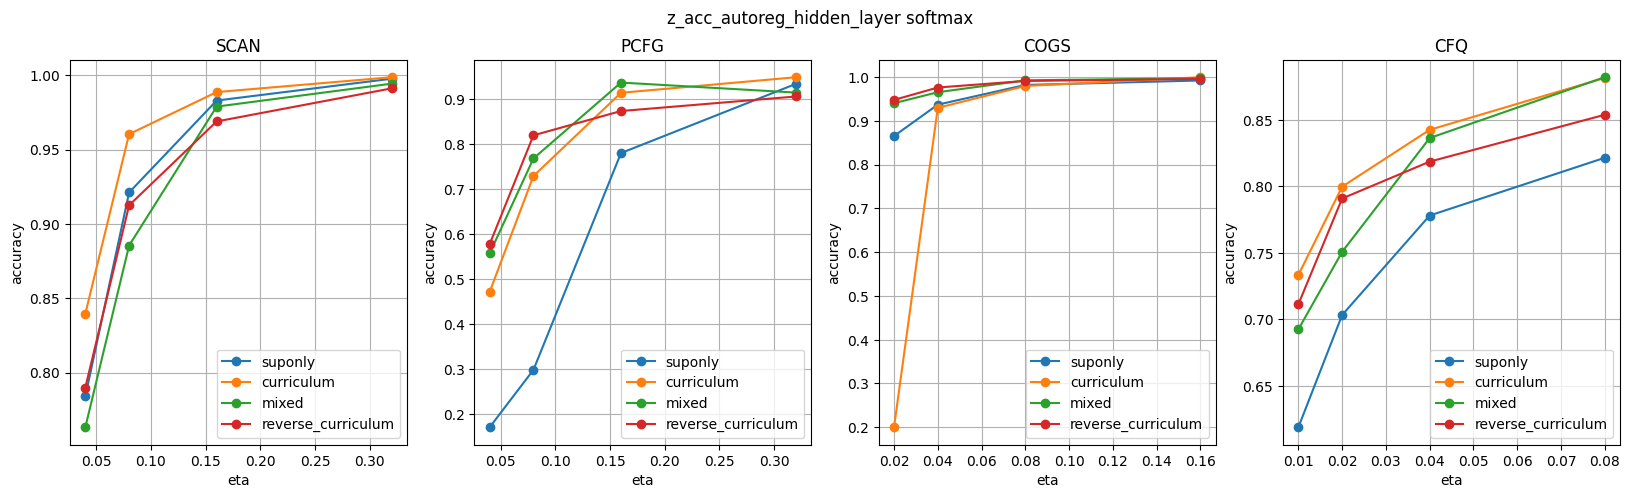

In [56]:
metric = z_acc_autoreg_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"z_acc_autoreg_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"z_acc_autoreg_sentence_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = z_acc_autoreg
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"z_acc_autoreg {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"z_acc_autoreg_sentence {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = x_acc_teacherforced
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"x_acc_teacherforced {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


### Subplots --- DISC: Gumbel

In [ ]:
metric = z_acc_autoreg_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "gumbel"
fig.suptitle(f"z_acc_autoreg_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg_sentence_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = z_acc_autoreg
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg_sentence {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = x_acc_teacherforced
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"x_acc_teacherforced {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


### Subplots --- DISC: VQ-VAE

In [ ]:
metric = z_acc_autoreg_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "vqvae"
fig.suptitle(f"z_acc_autoreg_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence_hidden_layer
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg_sentence_hidden_layer {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = z_acc_autoreg
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


metric = z_acc_autoreg_sentence
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"z_acc_autoreg_sentence {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)

metric = x_acc_teacherforced
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.suptitle(f"x_acc_teacherforced {disc}")
for i, dataset_name in enumerate(datasets_names):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        metric[dataset_name]['suponly']['softmax'][:4]
        axs[i].plot(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].set_ylabel("accuracy")
        axs[i].legend()
        axs[i].grid('on')
        axs[i].set_title(dataset_name)
        # plot the error bars as well
        # axs[i].errorbar(etas[dataset_name], metric[dataset_name][method][disc][0][:len(etas[dataset_name])], yerr=metric[dataset_name][method][disc][1][:len(etas[dataset_name])], fmt='o', ecolor='orangered', capthick=2)


### Bar Plots

[0.04, 0.08, 0.16, 0.32]
{'curriculum': {'softmax': [[0.47182, 0.72882, 0.91334, 0.94791], [0.00274, 0.00329, 0.00371, 0.00244]], 'gumbel': [[0.44089, 0.62379, 0.84663, 0.87849], [0.0025, 0.0045, 0.0035, 0.00324]], 'vqvae': [[0.41399, 0.86014, 0.89591, 0.93345], [0.00249, 0.00282, 0.00305, 0.00224]]}, 'suponly': {'softmax': [[0.17158, 0.29884, 0.77967, 0.93326, 0.97057], [0.00104, 0.002, 0.00351, 0.00248, 0.00263]], 'gumbel': [[0.16026, 0.25495, 0.70079, 0.82183, 0.88889], [0.00125, 0.00201, 0.004, 0.00338, 0.00335]], 'vqvae': [[0.23391, 0.86291, 0.87205, 0.9311, 0.90784], [0.0017, 0.00361, 0.004, 0.00309, 0.00325]]}, 'mixed': {'softmax': [[0.55723, 0.76769, 0.93605, 0.91383], [0.00382, 0.00345, 0.00269, 0.00303]], 'gumbel': [[0.24951, 0.66183, 0.80749, 0.85501], [0.00158, 0.00402, 0.00432, 0.00355]], 'vqvae': [[0.31116, 0.66038, 0.90459, 0.8866], [0.00155, 0.00432, 0.00332, 0.00341]]}, 'reverse_curriculum': {'softmax': [[0.57766, 0.81905, 0.87292, 0.90519], [0.00451, 0.00312, 0.00392,

IndexError: list index out of range

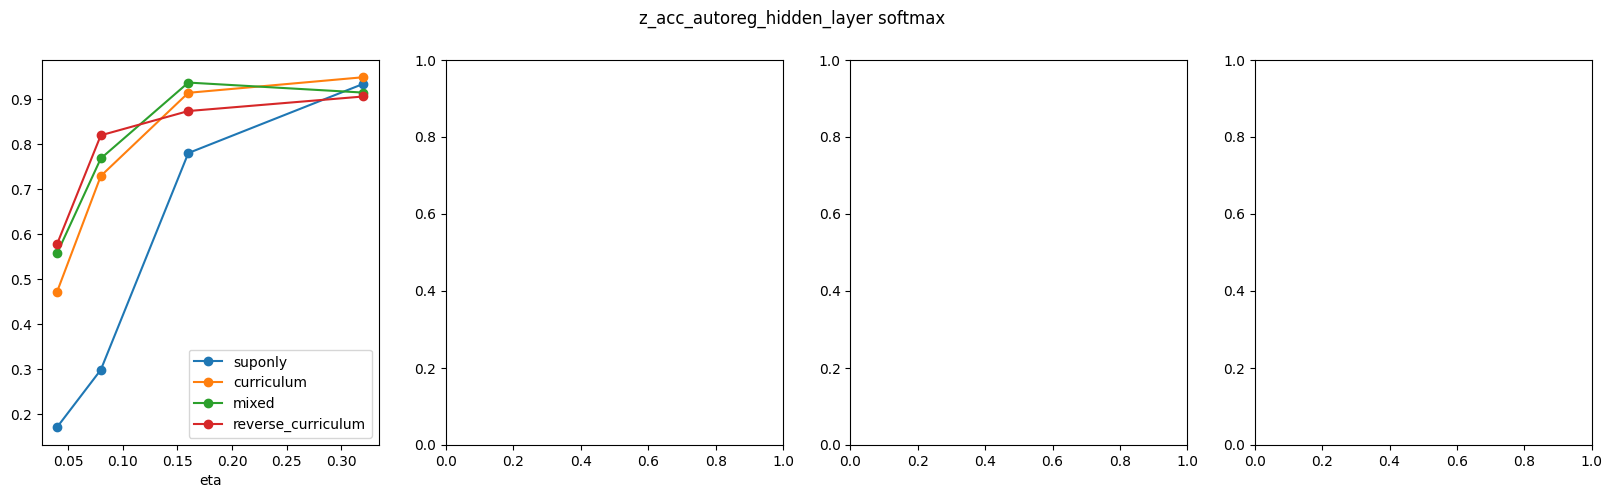

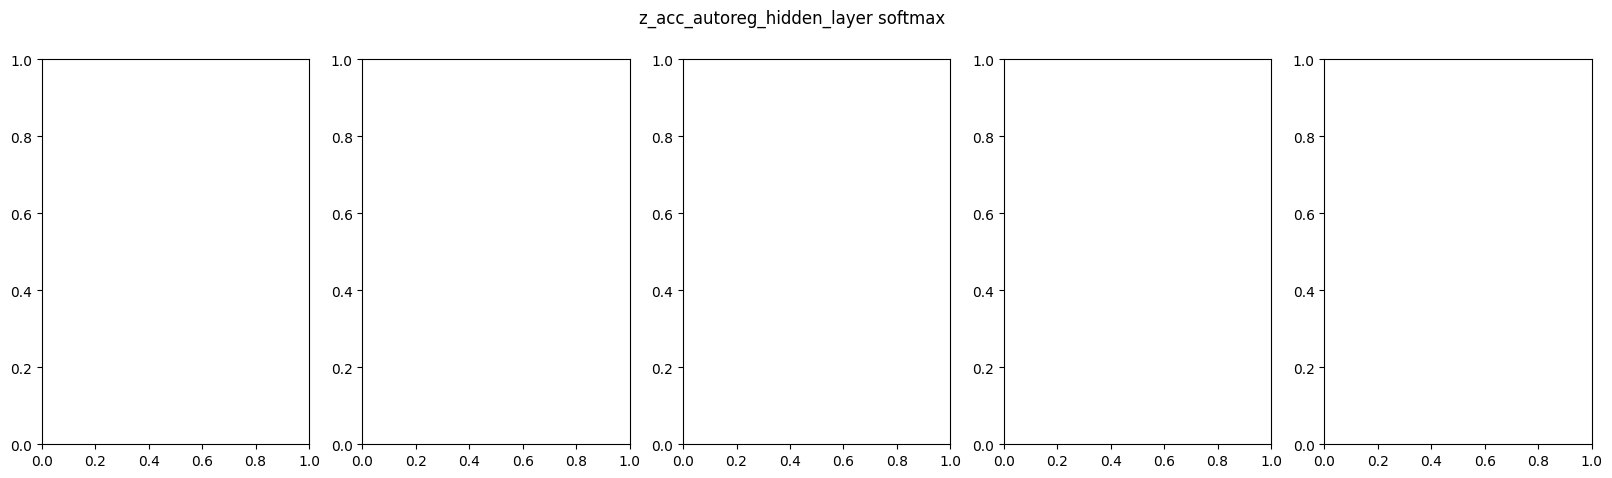

In [33]:
# we have 5 datasets, 4 methods, 3 discretizers, 5 metrics
# for each metric we want a figure containing 5 plots (one for each dataset)
# each plot itself contains 4 lines (one for each method)
# the x-axis comes from etas, the y-axis comes from the metric

metric = z_acc_autoreg_hidden_layer

# create a subplot of size 1 x 5
# for each dataset, plot the 4 methods
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
disc = "softmax"
fig.suptitle(f"z_acc_autoreg_hidden_layer {disc}")
for i, datasets_name in enumerate(["PCFG"]):
# for i, datasets_name in enumerate(datasets_names):
    for method in ["suponly", "curriculum", "mixed", "reverse_curriculum"]:
        print(etas[datasets_name])
        print(metric[datasets_name])
        metric['PCFG']['suponly']['softmax'][:4]
        axs[i].plot(etas[datasets_name], metric[datasets_name][method][disc][0][:len(etas[datasets_name])], label=method, marker="o")
        axs[i].set_xlabel("eta")
        axs[i].legend()
# axs[1].plot(etas["PCFG"], metric["PCFG"]["suponly"]["softmax"][0], label="suponly")
# axs[1].plot(etas["PCFG"], metric["PCFG"]["curriculum"]["softmax"][0], label="curriculum")
# axs[1].plot(etas["PCFG"], metric["PCFG"]["mixed"]["softmax"][0], label="mixed")
# axs[1].plot(etas["PCFG"], metric["PCFG"]["reverse_curriculum"]["softmax"][0], label="reverse_curriculum")
# axs[1].legend()
# axs[2].plot(etas["PCFG"], metric["PCFG"]["suponly"]["softmax"][0], label="suponly")
# axs[2].plot(etas["PCFG"], metric["PCFG"]["curriculum"]["softmax"][0], label="curriculum")
# axs[2].plot(etas["PCFG"], metric["PCFG"]["mixed"]["softmax"][0], label="mixed")
# axs[2].plot(etas["PCFG"], metric["PCFG"]["reverse_curriculum"]["softmax"][0], label="reverse_curriculum")
# axs[2].legend()
# axs[3].plot(etas["PCFG"], metric["PCFG"]["suponly"]["softmax"][0], label="suponly")
# axs[3].plot(etas["PCFG"], metric["PCFG"]["curriculum"]["softmax"][0], label="curriculum")
# axs[3].plot(etas["PCFG"], metric["PCFG"]["mixed"]["softmax"][0], label="mixed")
# axs[3].plot(etas["PCFG"], metric["PCFG"]["reverse_curriculum"]["softmax"][0], label="reverse_curriculum")
# axs[3].legend()
# axs[4].plot(etas["PCFG"], metric["PCFG"]["suponly"]["softmax"][0], label="suponly")
# axs[4].plot(etas["PCFG"], metric["PCFG"]["curriculum"]["softmax"][0], label="curriculum")
# axs[4].plot(etas["PCFG"], metric["PCFG"]["mixed"]["softmax"][0], label="mixed")
# axs[4].plot(etas["PCFG"], metric["PCFG"]["reverse_curriculum"]["softmax"][0], label="reverse_curriculum")
# axs[4].legend()

# similarly create bar plots for different datasets for each metric
# create a subplot of size 1 x 5
# the bar plot should be like the following. For each eta, we have a bar, but this bar (at each eta) is divided into 4 parts
# the lowest block starts from 0 on y-axis and extends to the value of the sorted metric (based on methods), 
# the next block starts from the value of the lowest block and extends to the value of the second lowest block, and so on
# each block is colored based on the method, and the legend should be shown on the right side of the plot

# create a subplot of size 1 x 5
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
# sort metric based on methods for a fixed discretizer and eta.
disc = "softmax"
fig.suptitle(f"z_acc_autoreg_hidden_layer {disc}")
colors = ["red", "green", "blue", "yellow"]
for ax_id in range(5):
    if ax_id != 2:
        continue
    for i, eta in enumerate(etas[datasets_names[ax_id]]):
        metrics_ = [metric[datasets_names[ax_id]][key][disc][0][i] for key in methods]
        sorted_metric = sorted(metrics_)
        sorted_metric_inc = [sorted_metric[j] - sorted_metric[j-1] for j in range(1, len(sorted_metric))]
        sorted_metric_inc.insert(0, sorted_metric[0])
        sorted_index = [metrics_.index(sorted_metric[j]) for j in range(len(sorted_metric))]
        sorted_methods = [methods[sorted_index[j]] for j in range(len(sorted_index))]
        sorted_colors = [colors[sorted_index[j]] for j in range(len(sorted_index))]
        bottoms = sorted_metric[:-1]
        bottoms.insert(0, 0.0)
        if i == 0:
            axs[ax_id].bar(eta, sorted_metric_inc, bottom=bottoms, label=sorted_methods, color=sorted_colors, width=0.01)
        else:
            axs[ax_id].bar(eta, sorted_metric_inc, bottom=bottoms, color=sorted_colors, width=0.01)
        axs[ax_id].set_xlabel("eta")
    axs[ax_id].legend()

# sorted_metric = sorted([metric["PCFG"][key]["softmax"][0][0] for key in methods])
# sorted_metric_inc = [sorted_metric[i] - sorted_metric[i-1] for i in range(1, len(sorted_metric))]
# sorted_metric_inc.insert(0, sorted_metric[0])
# sorted_index = [sorted_metric.index(metric["PCFG"][key]["softmax"][0][0]) for key in methods]
# sorted_methods = [methods[i] for i in sorted_index]
# bottoms = sorted_metric[:-1]
# bottoms.insert(0, 0.0)
# colors = ["red", "green", "blue", "yellow"]
# use small width for bars
# axs[0].bar(etas["PCFG"][0], sorted_metric_inc, bottom=bottoms, label=sorted_methods, color=colors, width=0.1)